In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
data = pd.read_csv("/Users/devvratmungekar/Library/CloudStorage/OneDrive-Personal/Canada/Trent University/Sem-4/AMOD-5610H-Big_Data_Major_Research_Paper/Training_Dataset_v2.csv")
data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [3]:
# Change -99 placeholder to NA
data['perf_6_month_avg'] = data['perf_6_month_avg'].replace(-99, np.NaN)
data['perf_12_month_avg'] = data['perf_12_month_avg'].replace(-99, np.NaN)

In [4]:
# missing_values_count
data.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg     129479
perf_12_month_avg    122051
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [5]:
# Filling missing values with mean of the column
def mean_fill_missing_value(data, x):
    data[x] = data[x].fillna(data[x].mean())

def bin_fill_missing_value(data, x):
    data[x] = data[x].fillna('No')

for feature in data.columns:
    if data[feature].dtypes != "O": # if type != object
        mean_fill_missing_value(data, feature)
    else: # if type = object
        bin_fill_missing_value(data, feature)

In [6]:
data.isnull().any()

sku                  False
national_inv         False
lead_time            False
in_transit_qty       False
forecast_3_month     False
forecast_6_month     False
forecast_9_month     False
sales_1_month        False
sales_3_month        False
sales_6_month        False
sales_9_month        False
min_bank             False
potential_issue      False
pieces_past_due      False
perf_6_month_avg     False
perf_12_month_avg    False
local_bo_qty         False
deck_risk            False
oe_constraint        False
ppap_risk            False
stop_auto_buy        False
rev_stop             False
went_on_backorder    False
dtype: bool

In [7]:
data.potential_issue.value_counts()

No     1686954
Yes        907
Name: potential_issue, dtype: int64

In [8]:
data['potential_issue'] = data['potential_issue'].map({'Yes': 1, 'No': 0}).astype('int')
data['deck_risk'] = data['deck_risk'].map({'Yes': 1, 'No': 0}).astype('int')
data['oe_constraint'] = data['oe_constraint'].map({'Yes': 1, 'No': 0}).astype('int')
data['ppap_risk'] = data['ppap_risk'].map({'Yes': 1, 'No': 0}).astype('int')
data['stop_auto_buy'] = data['stop_auto_buy'].map({'Yes': 1, 'No': 0}).astype('int')
data['rev_stop'] = data['rev_stop'].map({'Yes': 1, 'No': 0}).astype('int')
data['went_on_backorder'] = data['went_on_backorder'].map({'Yes': 1, 'No': 0}).astype('int')   

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687861 non-null  float64
 2   lead_time          1687861 non-null  float64
 3   in_transit_qty     1687861 non-null  float64
 4   forecast_3_month   1687861 non-null  float64
 5   forecast_6_month   1687861 non-null  float64
 6   forecast_9_month   1687861 non-null  float64
 7   sales_1_month      1687861 non-null  float64
 8   sales_3_month      1687861 non-null  float64
 9   sales_6_month      1687861 non-null  float64
 10  sales_9_month      1687861 non-null  float64
 11  min_bank           1687861 non-null  float64
 12  potential_issue    1687861 non-null  int64  
 13  pieces_past_due    1687861 non-null  float64
 14  perf_6_month_avg   1687861 non-null  float64
 15  perf_12_month_avg  1687861 non-n

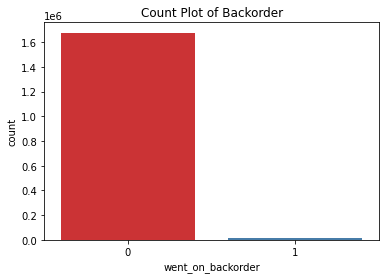

In [10]:
sns.countplot(data['went_on_backorder'], palette= 'Set1')
plt.title("Count Plot of Backorder")
plt.show()

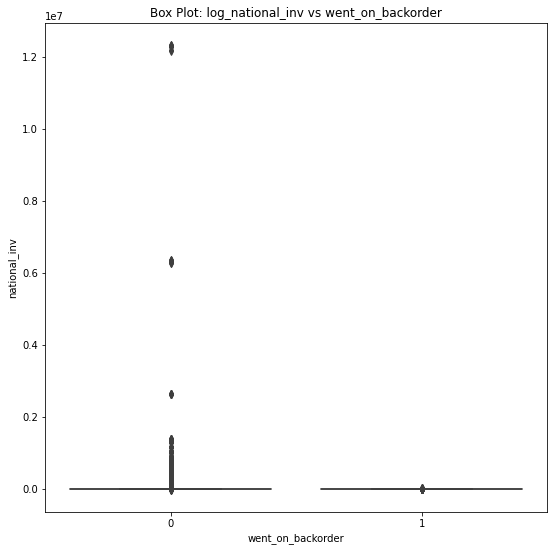

In [11]:
plt.figure(figsize= (9, 9))
sns.boxplot(x= 'went_on_backorder', y= 'national_inv', data= data)
plt.title('Box Plot: log_national_inv vs went_on_backorder')
plt.xlabel('went_on_backorder')
plt.ylabel('national_inv')
plt.show()

In [12]:
#applying log on national_inv and a small epsilon as there are zeros values. log(0) = inf. we don't want inf on our plot.
epsilon = 1e-7
log_national_inv = np.log(data['national_inv'] + epsilon)

In [13]:
data['log_national_inv'] = log_national_inv

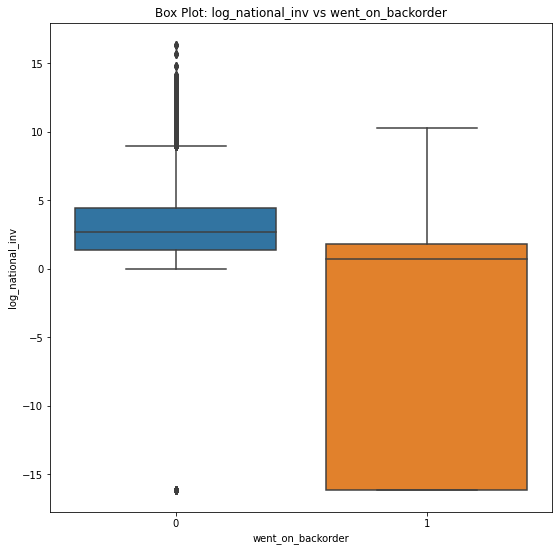

In [14]:
plt.figure(figsize=(9, 9))
sns.boxplot(x='went_on_backorder', y='log_national_inv', data=data)
plt.title('Box Plot: log_national_inv vs went_on_backorder')
plt.xlabel('went_on_backorder')
plt.ylabel('log_national_inv')
plt.show()

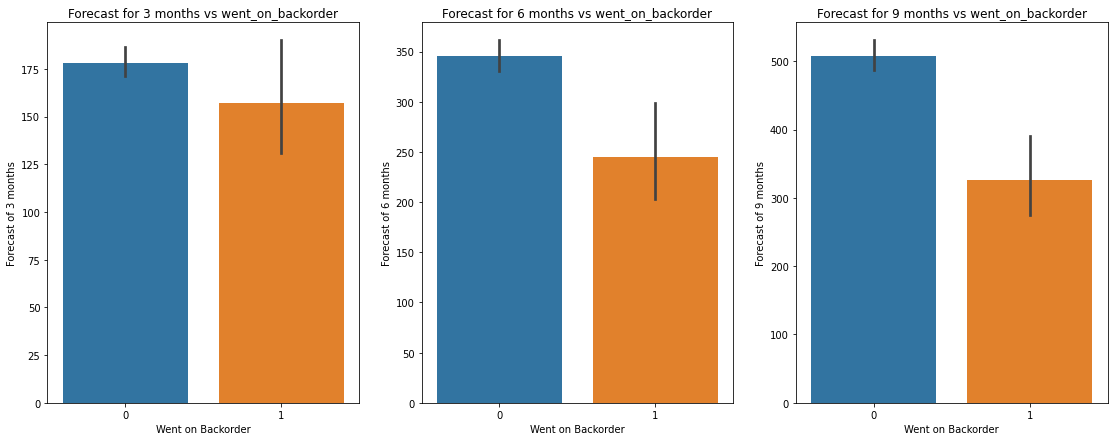

In [15]:
plt.figure(figsize= (19, 7))

plt.subplot(1, 3, 1)
sns.barplot(x= 'went_on_backorder', y= 'forecast_3_month', orient= 'v', data= data)
plt.title("Forecast for 3 months vs went_on_backorder")
plt.xlabel("Went on Backorder")
plt.ylabel("Forecast of 3 months")

plt.subplot(1, 3, 2)
sns.barplot(x='went_on_backorder', y='forecast_6_month', orient='v', data=data)
plt.title('Forecast for 6 months vs went_on_backorder')
plt.xlabel('Went on Backorder')
plt.ylabel('Forecast of 6 months')

plt.subplot(1, 3, 3)
sns.barplot(x='went_on_backorder', y='forecast_9_month', orient='v', data=data)
plt.title('Forecast for 9 months vs went_on_backorder')
plt.xlabel('Went on Backorder')
plt.ylabel('Forecast of 9 months')

plt.show()

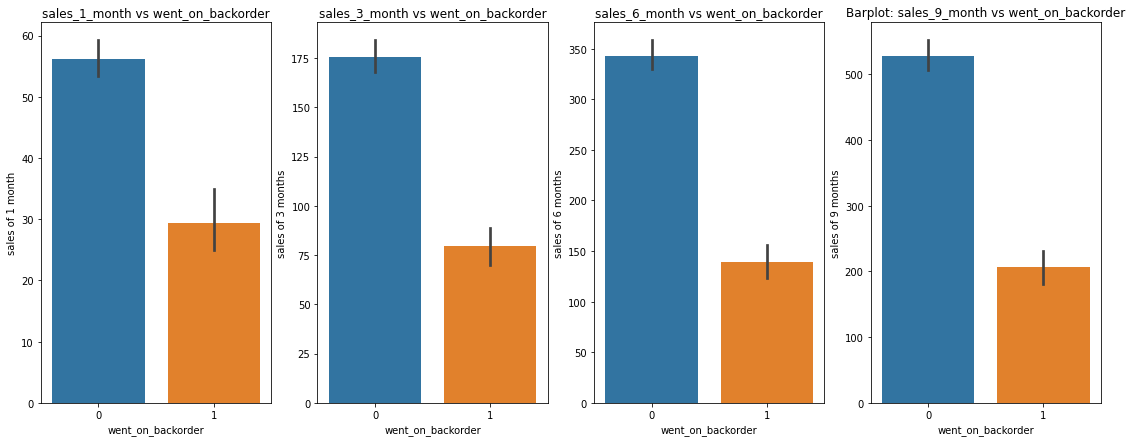

In [16]:
plt.figure(figsize=(19, 7))

plt.subplot(1, 4, 1)
sns.barplot(x='went_on_backorder', y='sales_1_month', orient='v', data=data)
plt.title('sales_1_month vs went_on_backorder')
plt.xlabel('went_on_backorder')
plt.ylabel('sales of 1 month')

plt.subplot(1, 4, 2)
sns.barplot(x='went_on_backorder', y='sales_3_month', orient='v', data=data)
plt.title('sales_3_month vs went_on_backorder')
plt.xlabel('went_on_backorder')
plt.ylabel('sales of 3 months')

plt.subplot(1, 4, 3)
sns.barplot(x='went_on_backorder', y='sales_6_month', orient='v', data=data)
plt.title('sales_6_month vs went_on_backorder')
plt.xlabel('went_on_backorder')
plt.ylabel('sales of 6 months')

plt.subplot(1, 4, 4)
sns.barplot(x='went_on_backorder', y='sales_9_month', orient='v', data=data)
plt.title('Barplot: sales_9_month vs went_on_backorder')
plt.xlabel('went_on_backorder')
plt.ylabel('sales of 9 months')

plt.show()

In [17]:
data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,log_national_inv
0,1026827,0.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.782381,0.776976,0.0,0,0,0,1,0,0,-16.118096
1,1043384,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.990000,0.990000,0.0,0,0,0,1,0,0,0.693147
2,1043696,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.782381,0.776976,0.0,1,0,0,1,0,0,0.693147
3,1043852,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.100000,0.130000,0.0,0,0,0,1,0,0,1.945910
4,1044048,8.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,0.782381,0.776976,0.0,1,0,0,1,0,0,2.079442


In [18]:
data.drop('log_national_inv', axis=1, inplace= True)
data.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [19]:
final_data = data.drop(["sku", "national_inv", "lead_time", "in_transit_qty", "min_bank", "potential_issue", 
                        "pieces_past_due", "local_bo_qty", "deck_risk", "oe_constraint", "ppap_risk", 
                        "stop_auto_buy", "rev_stop"], axis= 1)

In [20]:
final_data.head()

,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,perf_6_month_avg,perf_12_month_avg,went_on_backorder
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.782381,0.776976,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.990000,0.990000,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.782381,0.776976,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.130000,0
4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.782381,0.776976,0


In [21]:
X = final_data.drop(['went_on_backorder'], axis= 1).values
y = final_data['went_on_backorder'].values

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .33, random_state= 20)

### Logistic Regression

In [24]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, roc_auc_score

In [25]:
robust_scaler = RobustScaler() # scaling number to remove outliers
X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.fit_transform(X_test)

In [26]:
lr = LogisticRegression(solver= 'saga', penalty= 'l2')
lr.fit(X_train_scaled, y_train)

LogisticRegression(solver='saga')

In [27]:
lr_pred = lr.predict(X_test_scaled)

Text(114.0, 0.5, 'True labels')

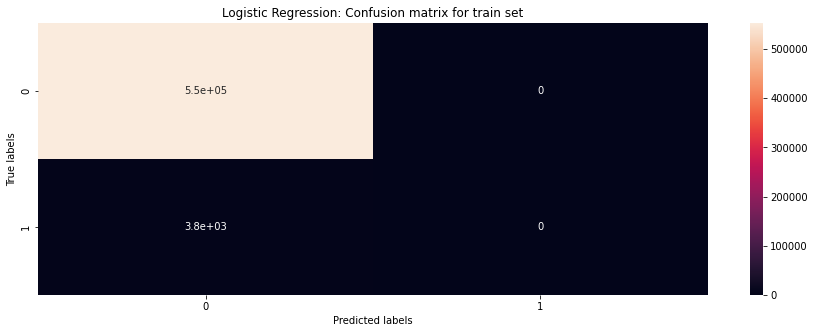

In [28]:
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True)
plt.title('Logistic Regression: Confusion matrix for train set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

In [29]:
precision_lr = precision_score(y_test, lr_pred, average='macro')
print('The precision score the best logistic regression model on train set is:', precision_lr)

The precision score the best logistic regression model on train set is: 0.49660409878006084


In [30]:
accuracy_lr = accuracy_score(y_test, lr_pred)
print('The accuracy score the best logistic regression model on train set is:', accuracy_lr)

The accuracy score the best logistic regression model on train set is: 0.9932081975601217


In [31]:
recall_lr = recall_score(y_test, lr_pred, average='macro')
print('The recall score the best logistic regression model on train set is:', recall_lr)

The recall score the best logistic regression model on train set is: 0.5


In [32]:
auc_lr = roc_auc_score(y_test, lr_pred, average='macro')
print('The AUC score the best logistic regression model on train set is:', auc_lr)

The AUC score the best logistic regression model on train set is: 0.5


### Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
dtree = DecisionTreeClassifier(criterion= 'gini', class_weight= 'balanced')

In [35]:
params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

In [36]:
dtree_grid_search = GridSearchCV(dtree, params, n_jobs= -1, scoring= 'roc_auc')
dtree_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             scoring='roc_auc')

In [37]:
best_max_depth = dtree_grid_search.best_estimator_.max_depth

In [38]:
best_tree = DecisionTreeClassifier(criterion= 'gini', max_depth= best_max_depth, class_weight= 'balanced')

In [39]:
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8)

In [40]:
best_tree_pred = best_tree.predict(X_test)

Text(114.0, 0.5, 'True labels')

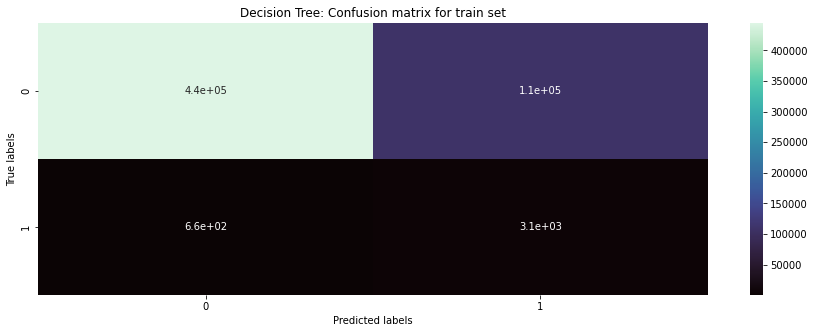

In [41]:
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(y_test, best_tree_pred), annot=True, cmap='mako')
plt.title('Decision Tree: Confusion matrix for train set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

In [42]:
precision_dt = precision_score(y_test, best_tree_pred, average='macro')
print('The precision score of the decision tree model on train set is:', precision_dt)

The precision score of the decision tree model on train set is: 0.513253168498357


In [43]:
accuracy_dt = accuracy_score(y_test, best_tree_pred)
print('The accuracy score the best decision tree model on train set is:',accuracy_dt)

The accuracy score the best decision tree model on train set is: 0.804167003294464


In [44]:
recall_dt = recall_score(y_test,best_tree_pred, average='macro')
print('The recall score the best decision tree model on train set is:',recall_dt)

The recall score the best decision tree model on train set is: 0.8146468191474427


In [45]:
auc_dt = roc_auc_score(y_test,best_tree_pred, average='macro')
print('The AUC score the best decision tree model on train set is:',auc_dt)

The AUC score the best decision tree model on train set is: 0.8146468191474426


### Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

In [48]:
rf_pred = rf.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9938311834038007


In [50]:
precision = precision_score(y_test, rf_pred)
print("Precision:", precision)

Precision: 0.6824395373291272


In [51]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import Image
from scipy.stats import randint
import graphviz

In [109]:
param_dist = {'n_estimators': randint(5,10),
              'max_depth': randint(1,20,2)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 scoring = 'roc_auc',
                                 n_jobs = -1,
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc7ceca5580>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc7cec942b0>},
                   scoring='roc_auc')

In [110]:
# Create a variable for the best model
best_n_estimator = rand_search.best_estimator_.n_estimators

best_max_depth = rand_search.best_estimator_.max_depth

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 8}


In [112]:
rf = RandomForestClassifier(criterion = 'gini', n_estimators = best_n_estimator , max_depth = best_max_depth)

In [113]:
# Fit the random search object to the data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=8)

In [114]:
from sklearn.metrics import ConfusionMatrixDisplay

# Generate predictions with the best model
rfcv_best_pred = rf.predict(X_test)

In [115]:
precision_rf = precision_score(y_test,rfcv_best_pred, average='macro')
print('The precision score of the decision tree model on train set is:', precision_rf)

The precision score of the decision tree model on train set is: 0.9035407424871247


In [116]:
accuracy_rf = accuracy_score(y_test,rfcv_best_pred)
print('The accuracy score the best decision tree model on train set is:',accuracy_rf)

The accuracy score the best decision tree model on train set is: 0.993323099848293


In [117]:
recall_rf = recall_score(y_test,rfcv_best_pred, average='macro')
print('The recall score the best decision tree model on train set is:',recall_rf)

The recall score the best decision tree model on train set is: 0.5109529570866087


In [118]:
auc_rf = roc_auc_score(y_test,rfcv_best_pred, average='macro')
print('The AUC score the best decision tree model on train set is:',auc_rf)

The AUC score the best decision tree model on train set is: 0.5109529570866087


Text(114.0, 0.5, 'True labels')

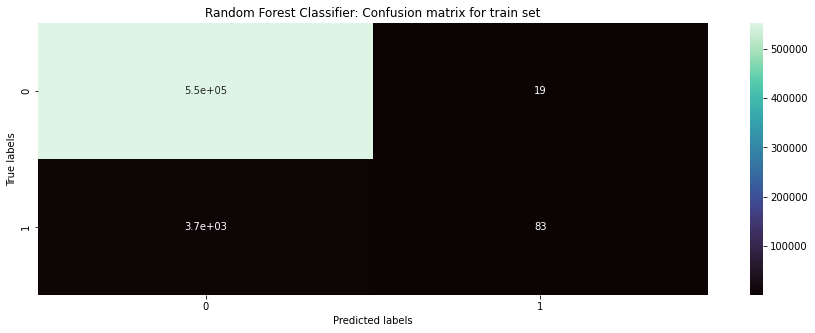

In [119]:
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(y_test, rfcv_best_pred), annot=True, cmap='mako')
plt.title('Random Forest Classifier: Confusion matrix for train set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

### K-nearest neighbors Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [61]:
knn_model = KNeighborsRegressor(algorithm = 'ball_tree', 
                                n_neighbors=3)

In [62]:
kn = knn_model.fit(X_train, y_train)

In [63]:
kn_pred = kn.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test, np.round(abs(kn_pred)))
print("Accuracy:", accuracy)

Accuracy: 0.9927414070144256


In [65]:
precision = precision_score(y_test, np.round(abs(kn_pred)))
print("Precision:", precision)

Precision: 0.4068767908309456


In [66]:
from sklearn.model_selection import cross_val_score
# Cross Validation
k_values = [i for i in range (1,5)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

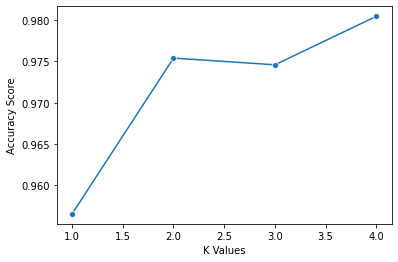

In [67]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [68]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

In [69]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [70]:
Best_k_pred = knn.predict(X_test)

In [71]:
precision_kn = precision_score(y_test,Best_k_pred , average='macro')
print('The precision score of the decision tree model on train set is:', precision_kn)

The precision score of the decision tree model on train set is: 0.7579665471123671


In [72]:
accuracy_kn = accuracy_score(y_test,Best_k_pred)
print('The accuracy score the best decision tree model on train set is:',accuracy_kn)

The accuracy score the best decision tree model on train set is: 0.9932333324356593


In [73]:
recall_kn = recall_score(y_test,Best_k_pred , average='macro')
print('The recall score the best decision tree model on train set is:',recall_kn)

The recall score the best decision tree model on train set is: 0.5214090802640272


In [74]:
auc_kn = roc_auc_score(y_test,Best_k_pred , average='macro')
print('The AUC score the best decision tree model on train set is:',auc_kn)

The AUC score the best decision tree model on train set is: 0.5214090802640272


Text(114.0, 0.5, 'True labels')

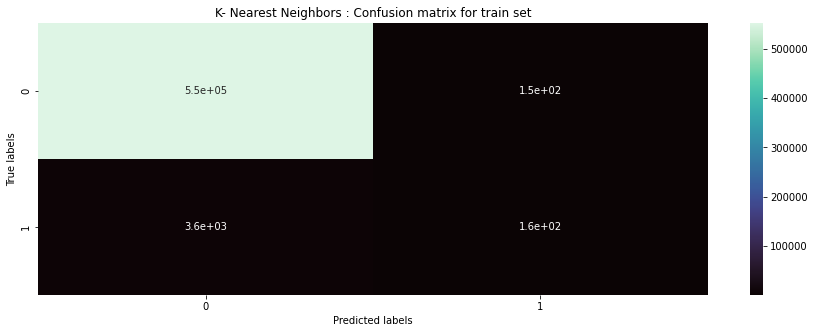

In [75]:
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(y_test, Best_k_pred), annot=True, cmap='mako')
plt.title('K- Nearest Neighbors : Confusion matrix for train set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

### Gaussian Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
gnb = GaussianNB()

In [78]:
gnb.fit(X_train, y_train)

GaussianNB()

In [79]:
gnb_pred = gnb.predict(X_test)

In [80]:
accuracy = accuracy_score(y_test, np.round(abs(gnb_pred)))
print("Accuracy:", accuracy)

Accuracy: 0.02964119965170244


In [81]:
precision = precision_score(y_test, np.round(abs(gnb_pred)))
print("Precision:", precision)

Precision: 0.00682194932791302


In [82]:
from sklearn.model_selection import KFold, cross_val_predict

In [83]:
k_folds = 5

In [84]:
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

In [85]:
gnb_best_pred = cross_val_predict(gnb,X_test, y_test, cv=kf)

In [86]:
precision_gnb = precision_score(y_test,gnb_best_pred , average='macro')
print('The precision score of the decision tree model on train set is:', precision_gnb)

The precision score of the decision tree model on train set is: 0.5012356285904382


In [87]:
accuracy_gnb = accuracy_score(y_test,gnb_best_pred)
print('The accuracy score the best decision tree model on train set is:',accuracy_gnb)

The accuracy score the best decision tree model on train set is: 0.028756092963132522


In [88]:
recall_gnb = recall_score(y_test,gnb_best_pred, average='macro')
print('The recall score the best decision tree model on train set is:',recall_gnb)

The recall score the best decision tree model on train set is: 0.503968857056106


In [89]:
auc_gnb = roc_auc_score(y_test,gnb_best_pred, average='macro')
print('The AUC score the best decision tree model on train set is:',auc_gnb)

The AUC score the best decision tree model on train set is: 0.503968857056106


Text(114.0, 0.5, 'True labels')

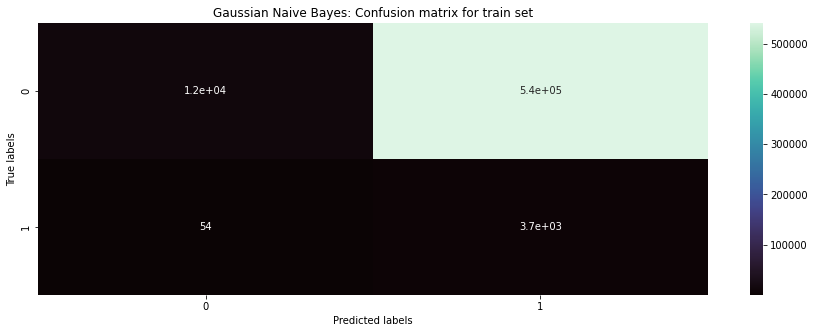

In [90]:
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(y_test,gnb_best_pred), annot=True, cmap='mako')
plt.title('Gaussian Naive Bayes: Confusion matrix for train set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

### XGBoost

In [91]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [92]:
dtrain= xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest= xgb.DMatrix(X_test, label=y_test)

In [93]:
params = {
    'objective': 'binary:logistic', 
    'eval_metric': 'logloss',       
    'eta': 0.1,                      # Learning rate
    'max_depth': 5,                  # Maximum depth of a tree
    'subsample': 0.8,                # Subsample ratio of the training instances
    'colsample_bytree': 0.8,         # Subsample ratio of features when constructing each tree
    'seed': 42                       # Random seed for reproducibility
}

In [94]:
num_round = 10  # Number of boosting rounds (trees)

# Train the model
model = xgb.train(params, dtrain, num_round)

In [95]:
# Predict on the test set
xgb_pred = model.predict(dtest)

# If it's a classification problem, convert probabilities to classes
# (0.5 is a commonly used threshold)
y_pred_class = [1 if prob > 0.5 else 0 for prob in xgb_pred]

In [96]:
precision_xgb = precision_score(y_test,y_pred_class , average='macro')
print('The precision score of the decision tree model on train set is:', precision_xgb)

The precision score of the decision tree model on train set is: 0.49660409878006084


In [97]:
accuracy_xgb = accuracy_score(y_test,y_pred_class)
print('The accuracy score the best decision tree model on train set is:',accuracy_xgb)

The accuracy score the best decision tree model on train set is: 0.9932081975601217


In [98]:
recall_xgb = recall_score(y_test,y_pred_class, average='macro')
print('The recall score the best decision tree model on train set is:',recall_xgb)

The recall score the best decision tree model on train set is: 0.5


In [99]:
auc_xgb = roc_auc_score(y_test,y_pred_class, average='macro')
print('The AUC score the best decision tree model on train set is:',auc_xgb)

The AUC score the best decision tree model on train set is: 0.5


Text(114.0, 0.5, 'True labels')

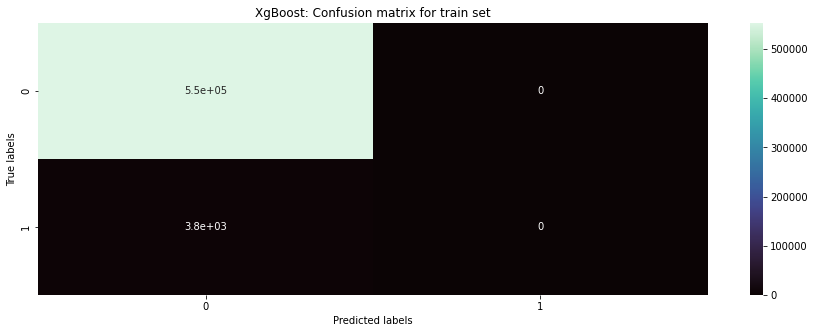

In [100]:
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(y_test,y_pred_class), annot=True, cmap='mako')
plt.title('XgBoost: Confusion matrix for train set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

In [101]:
### Evaluation

In [120]:
columns = ['Accuracy', 'Precision', 'Recall', 'AUC-ROC']
algorithms = ["Logistic Regression Classifier", "Decision Tree Classifier", "Random Forest Classifier", 
              "K-Nearest Classifer", "Gaussian Naïve Bayes", "XGBoost Classifiers"]
data = [[round(accuracy_lr*100,2),round(precision_lr*100,2), round(recall_lr*100,2),round(auc_lr*100,2)], 
        [round(accuracy_dt*100,2),round(precision_dt*100,2), round(recall_dt*100,2),round(auc_dt*100,2)], 
        [round(accuracy_rf*100,2),round(precision_rf*100,2), round(recall_rf*100,2),round(auc_rf*100,2)],
        [round(accuracy_kn*100,2),round(precision_kn*100,2), round(recall_kn*100,2),round(auc_kn*100,2)], 
        [round(accuracy_gnb*100,2),round(precision_gnb*100,2),round(recall_gnb*100,2),round(auc_gnb*100,2)], 
        [round(accuracy_xgb*100,2),round(precision_xgb*100,2),round(recall_xgb*100,2),round(auc_xgb*100,2)]
       ]

df_evaluation = pd.DataFrame(columns= columns, index= algorithms, data= data)
df_evaluation

,Accuracy,Precision,Recall,AUC-ROC
Logistic Regression Classifier,99.32,49.66,50.00,50.00
Decision Tree Classifier,80.42,51.33,81.46,81.46
Random Forest Classifier,99.33,90.35,51.10,51.10
K-Nearest Classifer,99.32,75.80,52.14,52.14
Gaussian Naïve Bayes,2.88,50.12,50.40,50.40
XGBoost Classifiers,99.32,49.66,50.00,50.00
